In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import math
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dataset
from sklearn import svm
from numpy import linalg as LA

In [ ]:
mnist = dataset.fetch_openml('mnist_784')
mnist_data = mnist.data
mnist_target = mnist.target

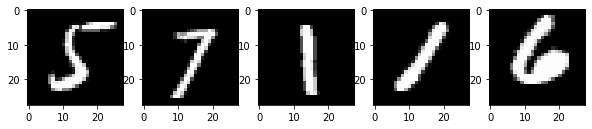

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
random_id = np.random.choice(mnist_data.shape[0],5)
for i in range(5):  
  ax.append(fig.add_subplot(1,5,i+1))
  ax[i].imshow(mnist_data[random_id[i]].reshape(28,28),cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
def randomizer(X,Y,extract):
  samples = X.shape[0]
  index = np.random.choice(samples,samples,replace=False) 
  X_rand = X[index]
  Y_rand = Y[index]
  X=X_rand[0:extract]
  Y=Y_rand[0:extract]
  return X,Y

X,Y = randomizer(mnist_data,mnist_target,10000)


In [ ]:
def KMeanizer(Data,k,iterations=2):
  a,b=Data.shape
  Centeroid_dum = []

  for iter in range(iterations):
    if (iter==0):
      for i in range(k):
        centeroid = np.random.uniform(low=0, high=13, size=(b,))
        Centeroid_dum.append(centeroid)


    C_dum = [[] for i in range(k)]
    dis_dum=np.zeros(k)
    

    for ith in range(a):
      for k_i in range(k):
        dis_dum[k_i]=LA.norm(Data[ith,:]-Centeroid_dum[k_i])
        C_dum[np.argmin(dis_dum)].append(Data[ith,:])


    for i in range(k):
      C_r=sum(C_dum[i])/(len(C_dum[i])+0.0001)
      Centeroid_dum[i]=C_r

  return Centeroid_dum

In [ ]:
X.shape

(10000, 784)

In [ ]:
# 2 iterations
k=10
Centroids= KMeanizer(X,k,iterations=2)
y_label=np.zeros(X.shape[0])

dis_dum=np.zeros(k)
for i in range(X.shape[0]):
  for kth in range(k):
    dis_dum[kth]=LA.norm(X[i,:]-Centroids[kth])
  y_label[i]=np.argmin(dis_dum)  


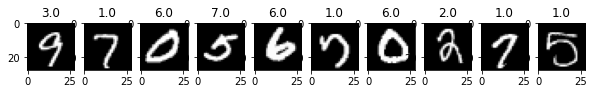

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
for i in range(10):  
  ax.append(fig.add_subplot(1,10,i+1))
  ax[i].imshow(X[i,:].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax[i].title.set_text(y_label[i])

plt.show()

In [ ]:
# Documentation of acccuracy

#scoring criteria:
# if two same labeled figures get different cluster labels, then error_1=1, else, error_1=0
# if two different labeled figures get different cluster labels, then error_2=0, else, error_2=1
# total error percentage would be (sum of normalized error_1 and error_2) 
# Accuracy would be compliment of total error


error_1=[]
error_2=[]
for i in range(X.shape[0]):
  for j in range(10):
    if (i!=j):
      if (Y[i]!=Y[j]):
        if (y_label[i]!=y_label[j]):
          error_2.append(0)
        else:
          error_2.append(1)
      elif (Y[i]==Y[j]):
        if (y_label[i]==y_label[j]):
          error_1.append(0)
        else:
          error_1.append(1)


total_error=(sum(error_1)/len(error_1)+sum(error_2)/len(error_2))


print("K_means accuracy:")
print(1-total_error)



K_means accuracy:
0.35391420466052126


In [ ]:
# 20 iterations
k=10
Centroids= KMeanizer(X,k,iterations=20)
y_label=np.zeros(X.shape[0])

dis_dum=np.zeros(k)
for i in range(X.shape[0]):
  for kth in range(k):
    dis_dum[kth]=LA.norm(X[i,:]-Centroids[kth])
  y_label[i]=np.argmin(dis_dum) 

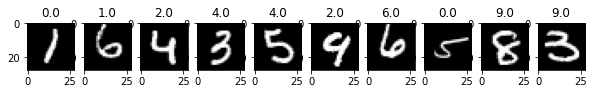

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
for i in range(10):  
  ax.append(fig.add_subplot(1,10,i+1))
  ax[i].imshow(X[i,:].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax[i].title.set_text(y_label[i])

plt.show()

In [ ]:
# Documentation of acccuracy

#scoring criteria:
# if two same labeled figures get different cluster labels, then error_1=1, else, error_1=0
# if two different labeled figures get different cluster labels, then error_2=0, else, error_2=1
# total error percentage would be (sum of normalized error_1 and error_2) 
# Accuracy would be compliment of total error


error_1=[]
error_2=[]
for i in range(X.shape[0]):
  for j in range(10):
    if (i!=j):
      if (Y[i]!=Y[j]):
        if (y_label[i]!=y_label[j]):
          error_2.append(0)
        else:
          error_2.append(1)
      elif (Y[i]==Y[j]):
        if (y_label[i]==y_label[j]):
          error_1.append(0)
        else:
          error_1.append(1)


total_error=(sum(error_1)/len(error_1)+sum(error_2)/len(error_2))


print("K_means accuracy:")
print(1-total_error)


K_means accuracy:
0.36393195302465564


Histogram of Orientations based Feature Reduction

In [ ]:
a,b=X.shape
X_featured=np.zeros((a,8*4))

In [ ]:
def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gnormal =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gnormal


# Defining a filter

def filter(image, kernel):

    # Convolution with vertical mask
    kernel = np.flipud(np.fliplr(kernel))

    x_K = kernel.shape[0] 
    y_K = kernel.shape[1] 
    x_I = image.shape[0] 
    y_I = image.shape[1]
    x_O = int(x_I -x_K  + 1)
    y_O = int(y_I -y_K + 1)
    output = np.zeros((x_O, y_O))
    for i in range(y_O):
        for j in range(x_O):
            output[j][i] = (kernel * image[j: j + x_K, i: i + y_K]).sum()
    return output


In [ ]:
division=4
for i in range(X_featured.shape[0]):
  image=X[i,:].reshape((28, 28))


  # Defining vertical Sobel Mask
  kernel_vert = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

  #Defining horizonatal Sobel Mask
  kernel_horz = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)


  # Applying vertical Sobel Mask
  kernel=kernel_vert
  new_image_sobel_y=filter(image,kernel)


  # Applying vertical Sobel Mask
  kernel=kernel_horz
  new_image_sobel_x=filter(image,kernel)

  # Gradiant Map
  gradient_mag = np.sqrt(np.square(new_image_sobel_x) + np.square(new_image_sobel_y))
  gradient_mag *= 255.0 / gradient_mag.max()

  # Angle Map
  angler=np.arctan2(new_image_sobel_y, new_image_sobel_x)
  angler[:,:] += np.pi

  Im_A=[]
  Im_M=[]

  Im_A.append(angler[0:14,0:14])
  Im_A.append(angler[0:14,12:28])
  Im_A.append(angler[12:28,0:14])
  Im_A.append(angler[12:28,12:28])

  Im_M.append(gradient_mag[0:14,0:14])
  Im_M.append(gradient_mag[0:14,12:28])
  Im_M.append(gradient_mag[12:28,0:14])
  Im_M.append(gradient_mag[12:28,12:28])

  
  feature=np.zeros(8*4)
  for div in range(4):
    bins=np.zeros(8)
    M=Im_M[div]
    A=Im_A[div]
    a,b=M.shape

    for x in range(a):
      for y in range(b):

        if 0<=A[x,y]<2*np.pi/8:
          bins[0]+=M[x,y]

        elif 2*np.pi/8<=A[x,y]<2*2*np.pi/8:
          bins[1]+=M[x,y]

        elif 2*2*np.pi/8<=A[x,y]<2*3*np.pi/8:
          bins[2]+=M[x,y]

        elif 2*3*np.pi/8<=A[x,y]<2*3*np.pi/8:
          bins[3]+=M[x,y]

        elif 2*4*np.pi/8<=A[x,y]<2*5*np.pi/8:
          bins[4]+=M[x,y]

        elif 2*5*np.pi/8<=A[x,y]<2*6*np.pi/8:
          bins[5]+=M[x,y]

        elif 2*6*np.pi/8<=A[x,y]<2*7*np.pi/8:
          bins[6]+=M[x,y]

        elif 2*7*np.pi/8<=A[x,y]<2*8*np.pi/8:
          bins[7]+=M[x,y]

    feature[div*8:(div+1)*8]=bins

  X_featured[i,:]=feature
        


In [ ]:
# 2 iterations
k=10
Centroids_F= KMeanizer(X_featured,k,iterations=2)

y_label_F=np.zeros(X.shape[0])

dis_dum=np.zeros(k)
for i in range(X.shape[0]):
  for kth in range(k):
    dis_dum[kth]=LA.norm(X_featured[i,:]-Centroids_F[kth])
  y_label_F[i]=np.argmin(dis_dum)  

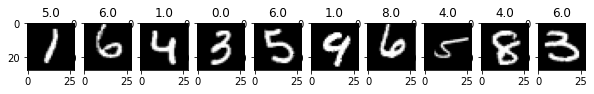

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
for i in range(10):  
  ax.append(fig.add_subplot(1,10,i+1))
  ax[i].imshow(X[i,:].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax[i].title.set_text(y_label_F[i])

plt.show()

In [ ]:
# Documentation of acccuracy

#scoring criteria:
# if two same labeled figures get different cluster labels, then error_1=1, else, error_1=0
# if two different labeled figures get different cluster labels, then error_2=0, else, error_2=1
# total error percentage would be (sum of normalized error_1 and error_2) 
# Accuracy would be compliment of total error


error_1=[]
error_2=[]
for i in range(X.shape[0]):
  for j in range(10):
    if (i!=j):
      if (Y[i]!=Y[j]):
        if (y_label_F[i]!=y_label_F[j]):
          error_2.append(0)
        else:
          error_2.append(1)
      elif (Y[i]==Y[j]):
        if (y_label_F[i]==y_label_F[j]):
          error_1.append(0)
        else:
          error_1.append(1)


total_error=(sum(error_1)/len(error_1)+sum(error_2)/len(error_2))


print("K_means accuracy:")
print(1-total_error)


K_means accuracy:
0.2681659784625343


In [ ]:
# 20 iterations
k=10
Centroids_F= KMeanizer(X_featured,k,iterations=20)

y_label_F=np.zeros(X.shape[0])

dis_dum=np.zeros(k)
for i in range(X.shape[0]):
  for kth in range(k):
    dis_dum[kth]=LA.norm(X_featured[i,:]-Centroids_F[kth])
  y_label_F[i]=np.argmin(dis_dum)  

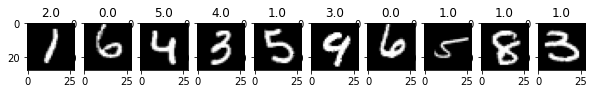

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
for i in range(10):  
  ax.append(fig.add_subplot(1,10,i+1))
  ax[i].imshow(X[i,:].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax[i].title.set_text(y_label_F[i])

plt.show()

In [ ]:
# Documentation of acccuracy

#scoring criteria:
# if two same labeled figures get different cluster labels, then error_1=1, else, error_1=0
# if two different labeled figures get different cluster labels, then error_2=0, else, error_2=1
# total error percentage would be (sum of normalized error_1 and error_2) 
# Accuracy would be compliment of total error


error_1=[]
error_2=[]
for i in range(X.shape[0]):
  for j in range(10):
    if (i!=j):
      if (Y[i]!=Y[j]):
        if (y_label_F[i]!=y_label_F[j]):
          error_2.append(0)
        else:
          error_2.append(1)
      elif (Y[i]==Y[j]):
        if (y_label_F[i]==y_label_F[j]):
          error_1.append(0)
        else:
          error_1.append(1)


total_error=(sum(error_1)/len(error_1)+sum(error_2)/len(error_2))


print("K_means accuracy:")
print(1-total_error)

K_means accuracy:
0.47301434733487124


What if I also gaussian filter the images before the orientation histogram determination?

In [ ]:
division=4
a,b=X.shape
X_featured=np.zeros((a,8*4))




for i in range(X_featured.shape[0]):
  imageg=X[i,:].reshape((28, 28))


  # # Denoising of image using Gaussian blur
  kernel=gauss_kernel(3,1);
  image=filter(imageg,kernel)

  # Defining vertical Sobel Mask
  kernel_vert = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

  #Defining horizonatal Sobel Mask
  kernel_horz = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)


  # Applying vertical Sobel Mask
  kernel=kernel_vert
  new_image_sobel_y=filter(image,kernel)


  # Applying vertical Sobel Mask
  kernel=kernel_horz
  new_image_sobel_x=filter(image,kernel)

  # Gradiant Map
  gradient_mag = np.sqrt(np.square(new_image_sobel_x) + np.square(new_image_sobel_y))
  gradient_mag *= 255.0 / gradient_mag.max()

  # Angle Map
  angler=np.arctan2(new_image_sobel_y, new_image_sobel_x)
  angler[:,:] += np.pi

  Im_A=[]
  Im_M=[]

  Im_A.append(angler[0:14,0:14])
  Im_A.append(angler[0:14,12:28])
  Im_A.append(angler[12:28,0:14])
  Im_A.append(angler[12:28,12:28])

  Im_M.append(gradient_mag[0:14,0:14])
  Im_M.append(gradient_mag[0:14,12:28])
  Im_M.append(gradient_mag[12:28,0:14])
  Im_M.append(gradient_mag[12:28,12:28])

  
  feature=np.zeros(8*4)
  for div in range(4):
    bins=np.zeros(8)
    M=Im_M[div]
    A=Im_A[div]
    a,b=M.shape

    for x in range(a):
      for y in range(b):

        if 0<=A[x,y]<2*np.pi/8:
          bins[0]+=M[x,y]

        elif 2*np.pi/8<=A[x,y]<2*2*np.pi/8:
          bins[1]+=M[x,y]

        elif 2*2*np.pi/8<=A[x,y]<2*3*np.pi/8:
          bins[2]+=M[x,y]

        elif 2*3*np.pi/8<=A[x,y]<2*3*np.pi/8:
          bins[3]+=M[x,y]

        elif 2*4*np.pi/8<=A[x,y]<2*5*np.pi/8:
          bins[4]+=M[x,y]

        elif 2*5*np.pi/8<=A[x,y]<2*6*np.pi/8:
          bins[5]+=M[x,y]

        elif 2*6*np.pi/8<=A[x,y]<2*7*np.pi/8:
          bins[6]+=M[x,y]

        elif 2*7*np.pi/8<=A[x,y]<2*8*np.pi/8:
          bins[7]+=M[x,y]

    feature[div*8:(div+1)*8]=bins

  X_featured[i,:]=feature

In [ ]:
# 20 iterations
k=10
Centroids_F= KMeanizer(X_featured,k,iterations=20)

y_label_F=np.zeros(X.shape[0])

dis_dum=np.zeros(k)
for i in range(X.shape[0]):
  for kth in range(k):
    dis_dum[kth]=LA.norm(X_featured[i,:]-Centroids_F[kth])
  y_label_F[i]=np.argmin(dis_dum)  

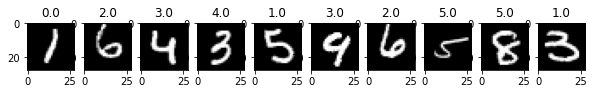

In [ ]:
fig = plt.figure(figsize=[10, 2])
ax = []
for i in range(10):  
  ax.append(fig.add_subplot(1,10,i+1))
  ax[i].imshow(X[i,:].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax[i].title.set_text(y_label_F[i])

plt.show()

In [ ]:
# Documentation of acccuracy

#scoring criteria:
# if two same labeled figures get different cluster labels, then error_1=1, else, error_1=0
# if two different labeled figures get different cluster labels, then error_2=0, else, error_2=1
# total error percentage would be (sum of normalized error_1 and error_2) 
# Accuracy would be compliment of total error


error_1=[]
error_2=[]
for i in range(X.shape[0]):
  for j in range(10):
    if (i!=j):
      if (Y[i]!=Y[j]):
        if (y_label_F[i]!=y_label_F[j]):
          error_2.append(0)
        else:
          error_2.append(1)
      elif (Y[i]==Y[j]):
        if (y_label_F[i]==y_label_F[j]):
          error_1.append(0)
        else:
          error_1.append(1)


total_error=(sum(error_1)/len(error_1)+sum(error_2)/len(error_2))


print("K_means accuracy:")
print(1-total_error)

K_means accuracy:
0.4213364390238066
